In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

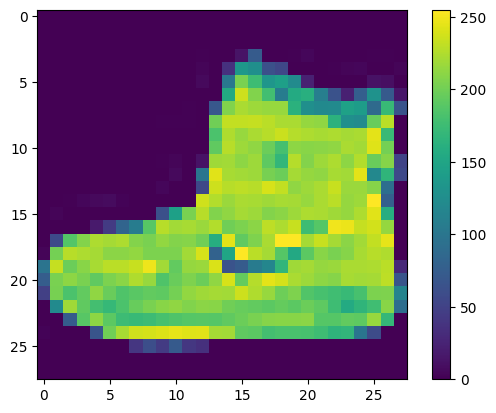

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

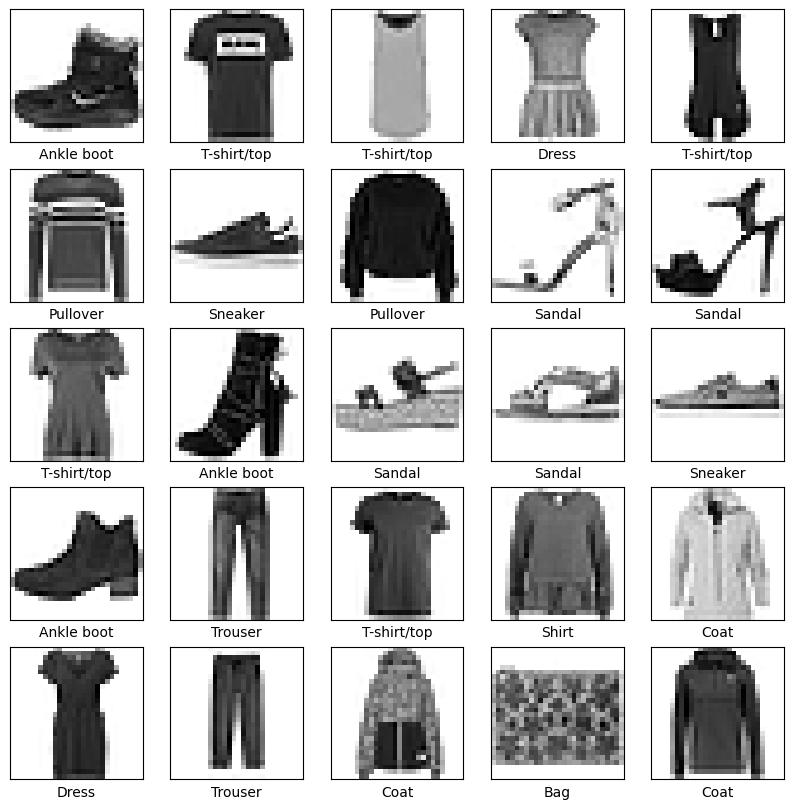

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
#Fitting the Model
history_1 = model.fit(train_images, train_labels,batch_size=64, epochs=10)
#Evaluating Accuracy


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 7s 4ms/step - loss: 0.6311 - accuracy: 0.7745
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4363 - accuracy: 0.8407
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3964 - accuracy: 0.8549
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3712 - accuracy: 0.8647
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3554 - accuracy: 0.8699
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3410 - accuracy: 0.8746
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3309 - accuracy: 0.8781
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3269 - accuracy: 0.8781
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3170 - accuracy: 0.8834
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3061 - accuracy: 0.8862


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3260 - accuracy: 0.8827 - 708ms/epoch - 2ms/step

Test accuracy: 0.8827000260353088


In [11]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
print('\nTrain accuracy:', train_acc)

1875/1875 - 3s - loss: 0.2558 - accuracy: 0.9060 - 3s/epoch - 2ms/step

Train accuracy: 0.9060333371162415


In [12]:
#Make Predictions
'''
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
'''

'\nprobability_model = tf.keras.Sequential([model,\n                                         tf.keras.layers.Softmax()])\npredictions = probability_model.predict(test_images)\npredictions[0]\n'

In [13]:
#np.argmax(predictions[0])

In [14]:
#test_labels[0]

In [12]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # First Conv2D layer with ReLU activation and batch normalization
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),

        # Second Conv2D layer with ReLU activation and batch normalization
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),

        # Flatten layer
        tf.keras.layers.Flatten(),

        # Dense layer with 128 units and ReLU activation
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

    return cnn_model

# Example of how to build and compile the model
cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 24)        96        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 36)        144       
 chNormalization)                                                
                                                      

In [13]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history_2 = cnn_model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 12s 8ms/step - loss: 0.4665 - accuracy: 0.8316
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3080 - accuracy: 0.8889
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2697 - accuracy: 0.9043
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2434 - accuracy: 0.9132
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2207 - accuracy: 0.9204
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1996 - accuracy: 0.9274
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1876 - accuracy: 0.9321
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1708 - accuracy: 0.9367
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1606 - accuracy: 0.9405
Epoch 10/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1543 - accuracy: 0.943

In [15]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc_cnn)

313/313 - 1s - loss: 0.2616 - accuracy: 0.9137 - 893ms/epoch - 3ms/step

Test accuracy: 0.9136999845504761


In [16]:
train_loss_cnn, train_acc_cnn = cnn_model.evaluate(train_images,  train_labels, verbose=2)
print('\nTrain accuracy:', train_acc_cnn)

1875/1875 - 4s - loss: 0.1170 - accuracy: 0.9576 - 4s/epoch - 2ms/step

Train accuracy: 0.9575666785240173


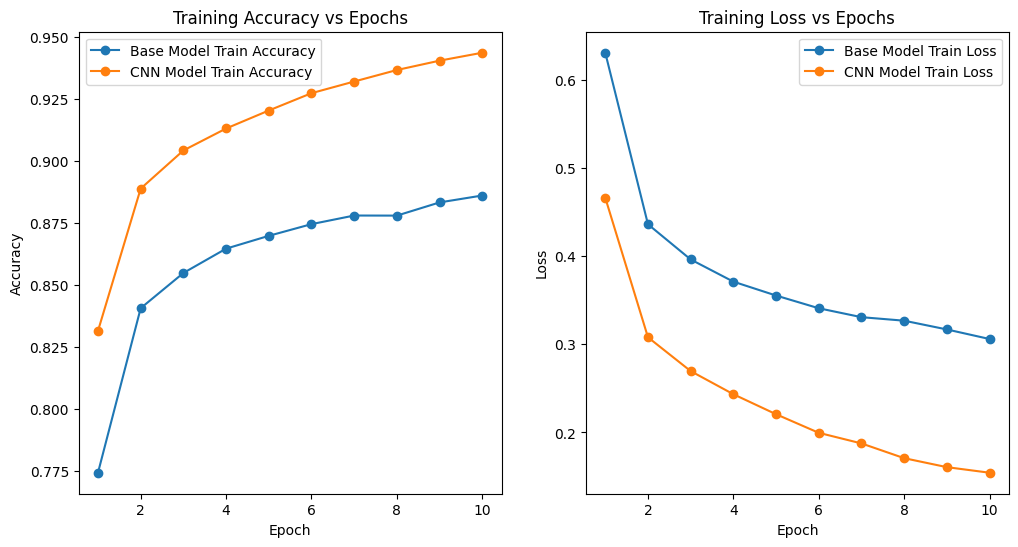

In [18]:
# Extract training accuracy and loss from the history objects
train_accuracy_1 = history_1.history['accuracy']
train_loss_1 = history_1.history['loss']

train_accuracy_2 = history_2.history['accuracy']
train_loss_2 = history_2.history['loss']

# Define epoch numbers for the x-axis
epochs = range(1, len(train_accuracy_1) + 1)

# Create a figure with two subplots: one for accuracy comparison and another for loss comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training accuracy comparison
ax1.plot(epochs, train_accuracy_1, label='Base Model Train Accuracy', marker='o')
ax1.plot(epochs, train_accuracy_2, label='CNN Model Train Accuracy', marker='o')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training Accuracy vs Epochs')
ax1.legend()

# Plot training loss comparison
ax2.plot(epochs, train_loss_1, label='Base Model Train Loss', marker='o')
ax2.plot(epochs, train_loss_2, label='CNN Model Train Loss', marker='o')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training Loss vs Epochs')
ax2.legend()

# Show the plots
plt.show()